In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
analysis='group_5_crimes_500m'
INPUT_DATA = "../../data/03_cleaned/crime_analysis_monthly.parquet"
OUTPUT_FIGURES = f"../../output/{analysis}/figures"
OUTPUT_TABLES = f"../../output/{analysis}/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

In [2]:
# Convert weekly panel to biweekly panel.
treatment_date_variable = 'latest_docket_month'
df = df.dropna(subset=treatment_date_variable)
# df = convert_weekly_panel_to_biweekly_panel(df, treatment_date_variable, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = get_value_variable_names(df, analysis)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis,
                                            treatment_date_variable=treatment_date_variable,
                                            output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Change in Crime Incidents, April 2019-March 2020   
                                                 \emph{Independent Variable}                                                                    
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_5_crimes_500m                                     6.876559e-209   
                                                 pre_treatment_change_in_group_5_crimes_500m                                     5.550688e-78   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                              1.755438e-10   
                                                 job_density_2013                                                                7.916092e-15   
                                                 med_hhinc2016                                                                   1.311885e-05   
                                                 poor_share2010                                                                  4.367146e-15   
                                                 popdensity2010                                                                  4.086128e-01   
Panel C: Case Initiation                         for_cause                                                                       5.934610e-01   
                                                 no_cause                                                                        1.684279e-01   
                                                 non_payment                                                                     2.256499e-03   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                        3.326388e-01   
                                                 hasAttyP                                                                        7.480729e-01   
                                                 isEntityD                                                                       3.765265e-03   
                                                 isEntityP                                                                       9.045829e-01   

                                                                                                               
                                                                                             Treated Property  
                                                 \emph{Independent Variable}                                   
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_5_crimes_500m      2.489008e-01  
                                                 pre_treatment_change_in_group_5_crimes_500m     2.469315e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                              8.133641e-01  
                                                 job_density_2013                                5.501121e-01  
                                                 med_hhinc2016                                   1.427126e-02  
                                                 poor_share2010                                  4.904136e-03  
                                                 popdensity2010                                  6.737331e-01  
Panel C: Case Initiation                         for_cause                                       5.801068e-03  
                                                 no_cause                                        3.431724e-02  
                                                 non_payment                                     3.013004e-07  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                        2.406617e-08  
                                                 hasAttyP                                

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                              Cases Won by Plaintiff   
Panel A Total Group 5 Incidents, 2017                      10.075393   
        $\Delta$ Group 5 Incidents, 2017-2019              -5.956021   
Panel B Bachelor's degree, 2010                             0.316407   
        Job density, 2013                               16161.032515   
        Median household income, 2016                   47553.063874   
        Poverty rate, 2010                                  0.279638   
Panel C Filing for nonpayment                               0.716230   
Panel D Defendant is entity                                 0.019895   

                                              Difference in Cases Won by Defendant  \
                                                                        Unweighted   
Panel A Total Group 5 Incidents, 2017                                     0.971850   
        $\Delta$ Group 5 Incidents, 2017-2019                            -0.679454   
Panel B Bachelor's degree, 2010                                           0.002512   
        Job density, 2013                                             -1272.661768   
        Median household income, 2016                                  2997.870414   
        Poverty rate, 2010                                               -0.021030   
Panel C Filing for nonpayment                                            -0.106658   
Panel D Defendant is entity                                              -0.008715   

                                                                         \
                                                   \emph{p}    Weighted   
Panel A Total Group 5 Incidents, 2017          2.489008e-01   -0.168938   
        $\Delta$ Group 5 Incidents, 2017-2019  2.469315e-01    0.091974   
Panel B Bachelor's degree, 2010                8.133641e-01   -0.007412   
        Job density, 2013                      5.501121e-01 -483.941014   
        Median household income, 2016          1.427126e-02 -916.852638   
        Poverty rate, 2010                     4.904136e-03   -0.008299   
Panel C Filing for nonpayment                  3.013004e-07   -0.025227   
Panel D Defendant is entity                    2.432211e-01   -0.001133   

                                                         
                                               \emph{p}  
Panel A Total Group 5 Incidents, 2017          0.838420  
        $\Delta$ Group 5 Incidents, 2017-2019  0.873512  
Panel B Bachelor's degree, 2010                0.485035  
        Job density, 2013                      0.821704  
        Median household income, 2016          0.375470  
        Poverty rate, 2010                     0.250328  
Panel C Filing for nonpayment                  0.105057  
Panel D Defendant is entity                    0.878765

In [5]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable=treatment_date_variable,
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='2W', base_period='universal')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 1104/1104 [00:09<00:00, 120.13it/s]


-0.01016448635462288
-0.006973194287915319
-0.006483758895181203
0.0034780375765011244


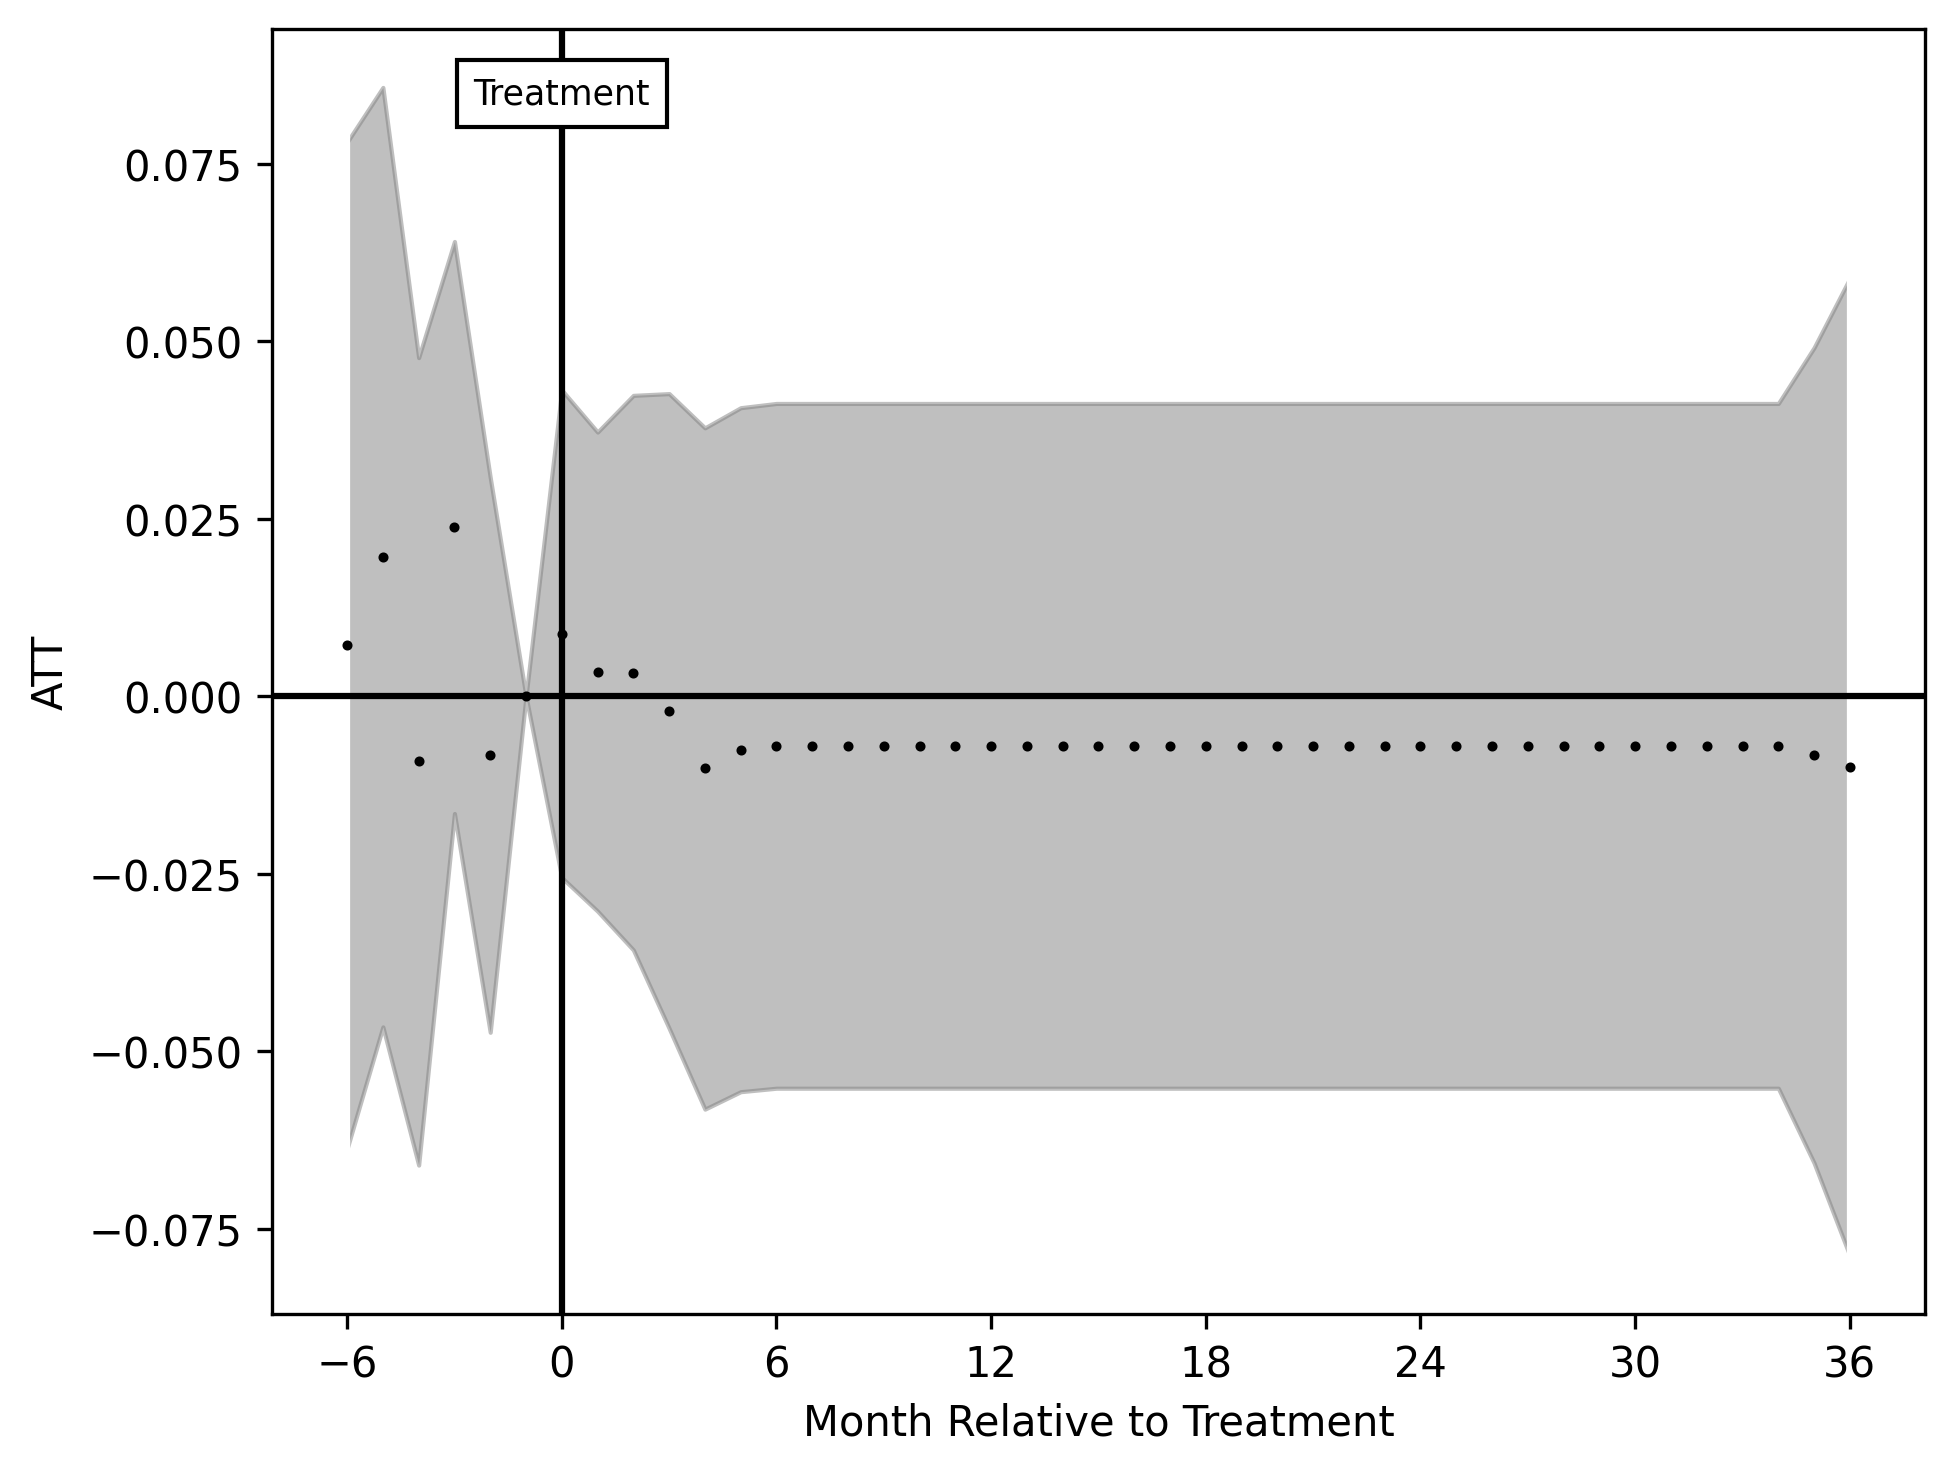

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-6, end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

In [8]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='M', base_period='universal')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]  100%|████████████████████| 1104/1104 [00:11<00:00, 97.28it/s] 


0.005492873237443257
0.008036451227243366
0.008163029282083371
0.01147206415847147


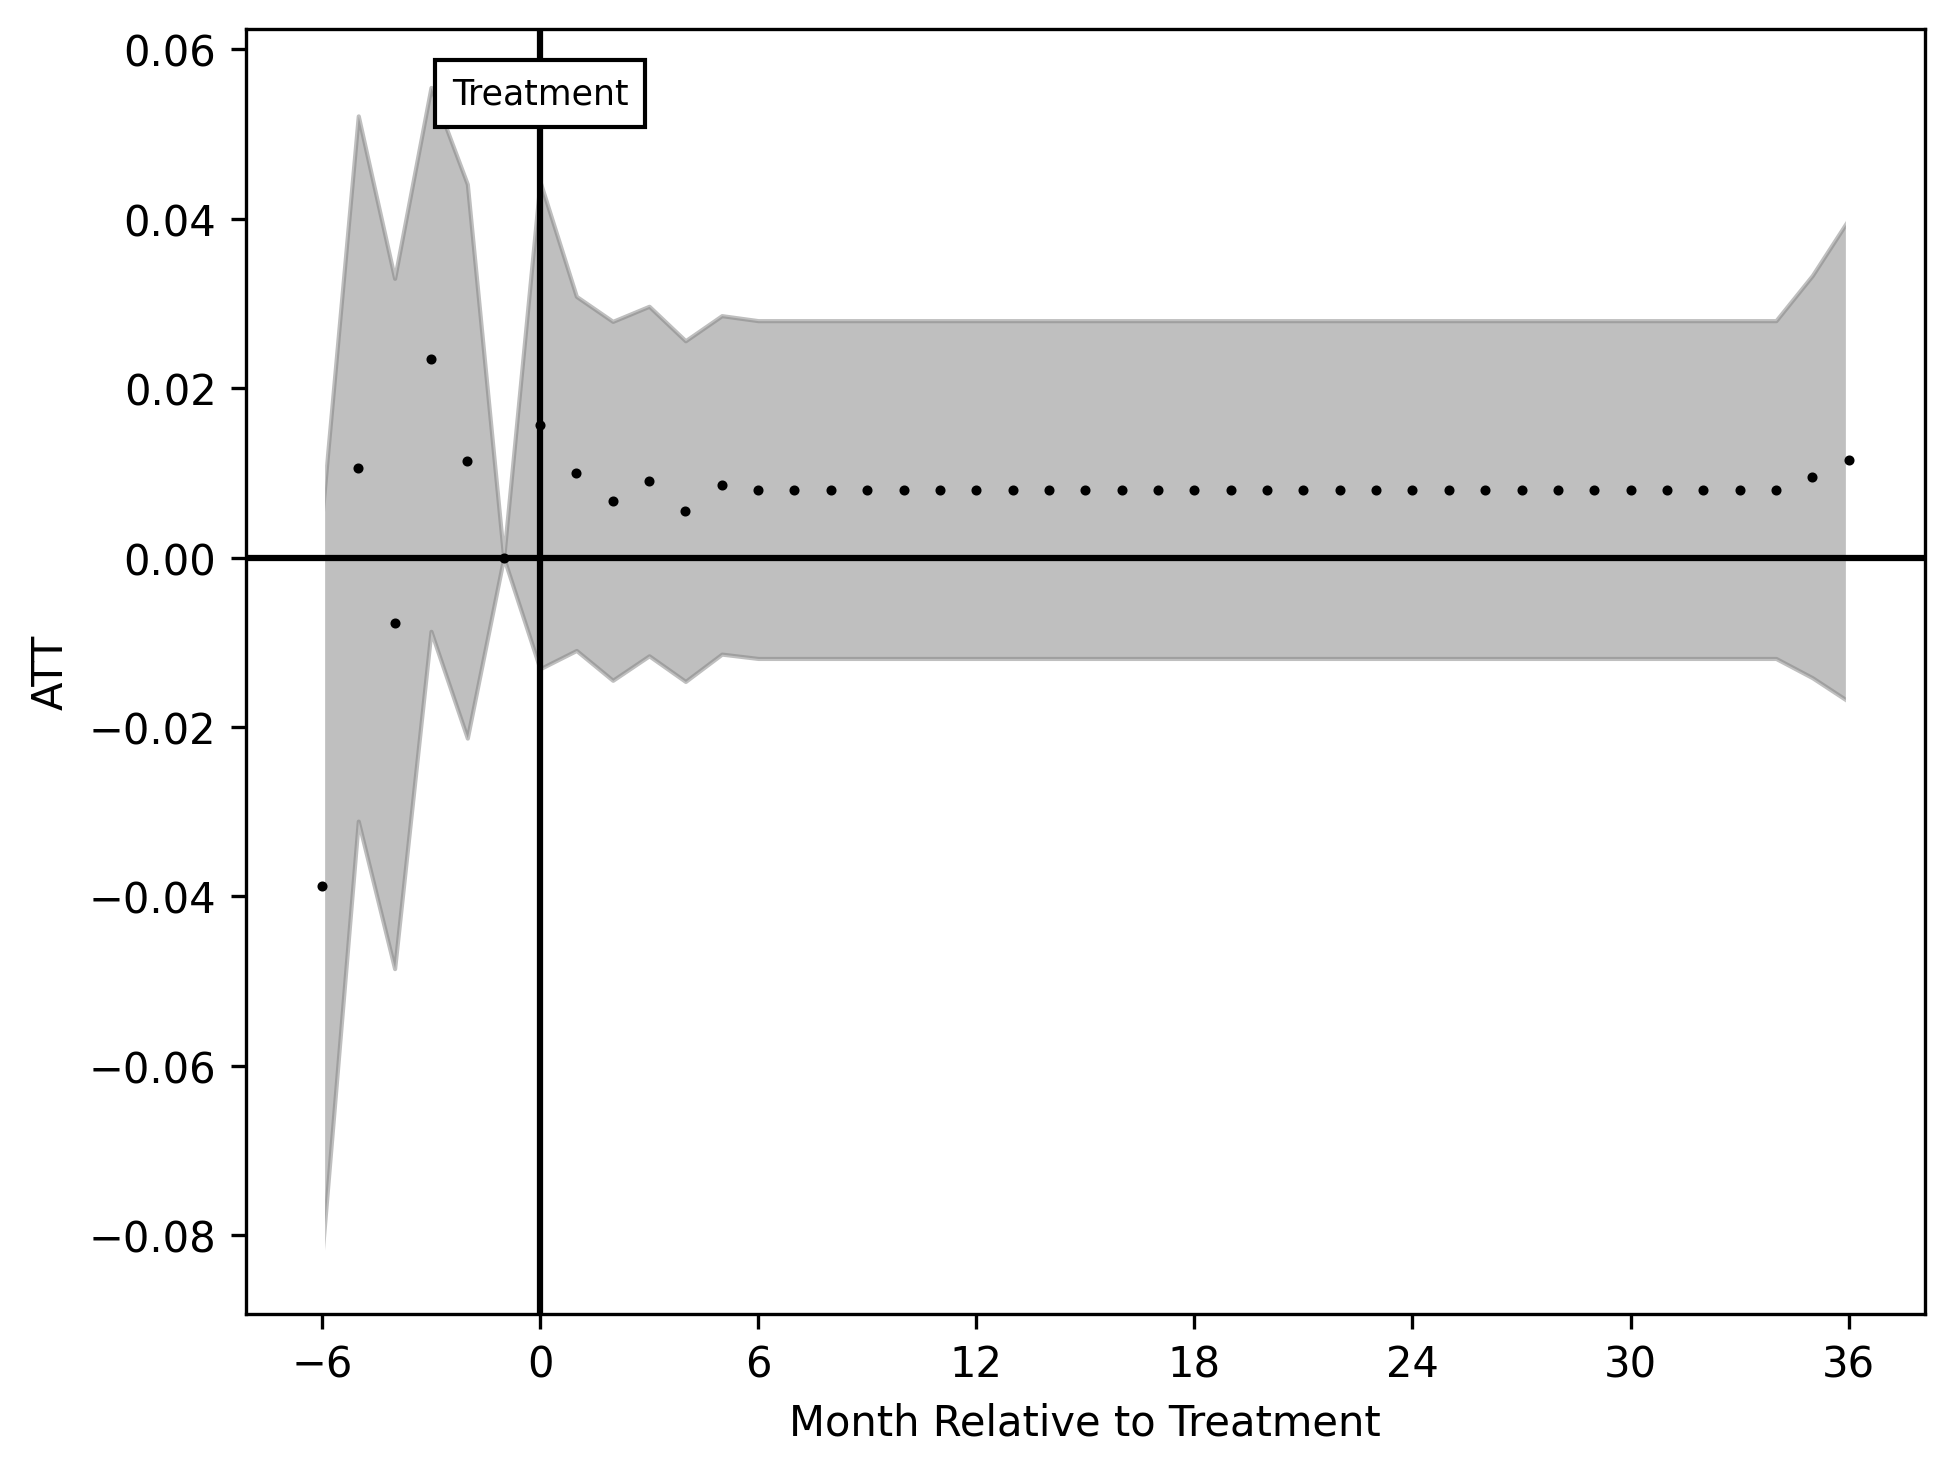

In [9]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-6,
                                 end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

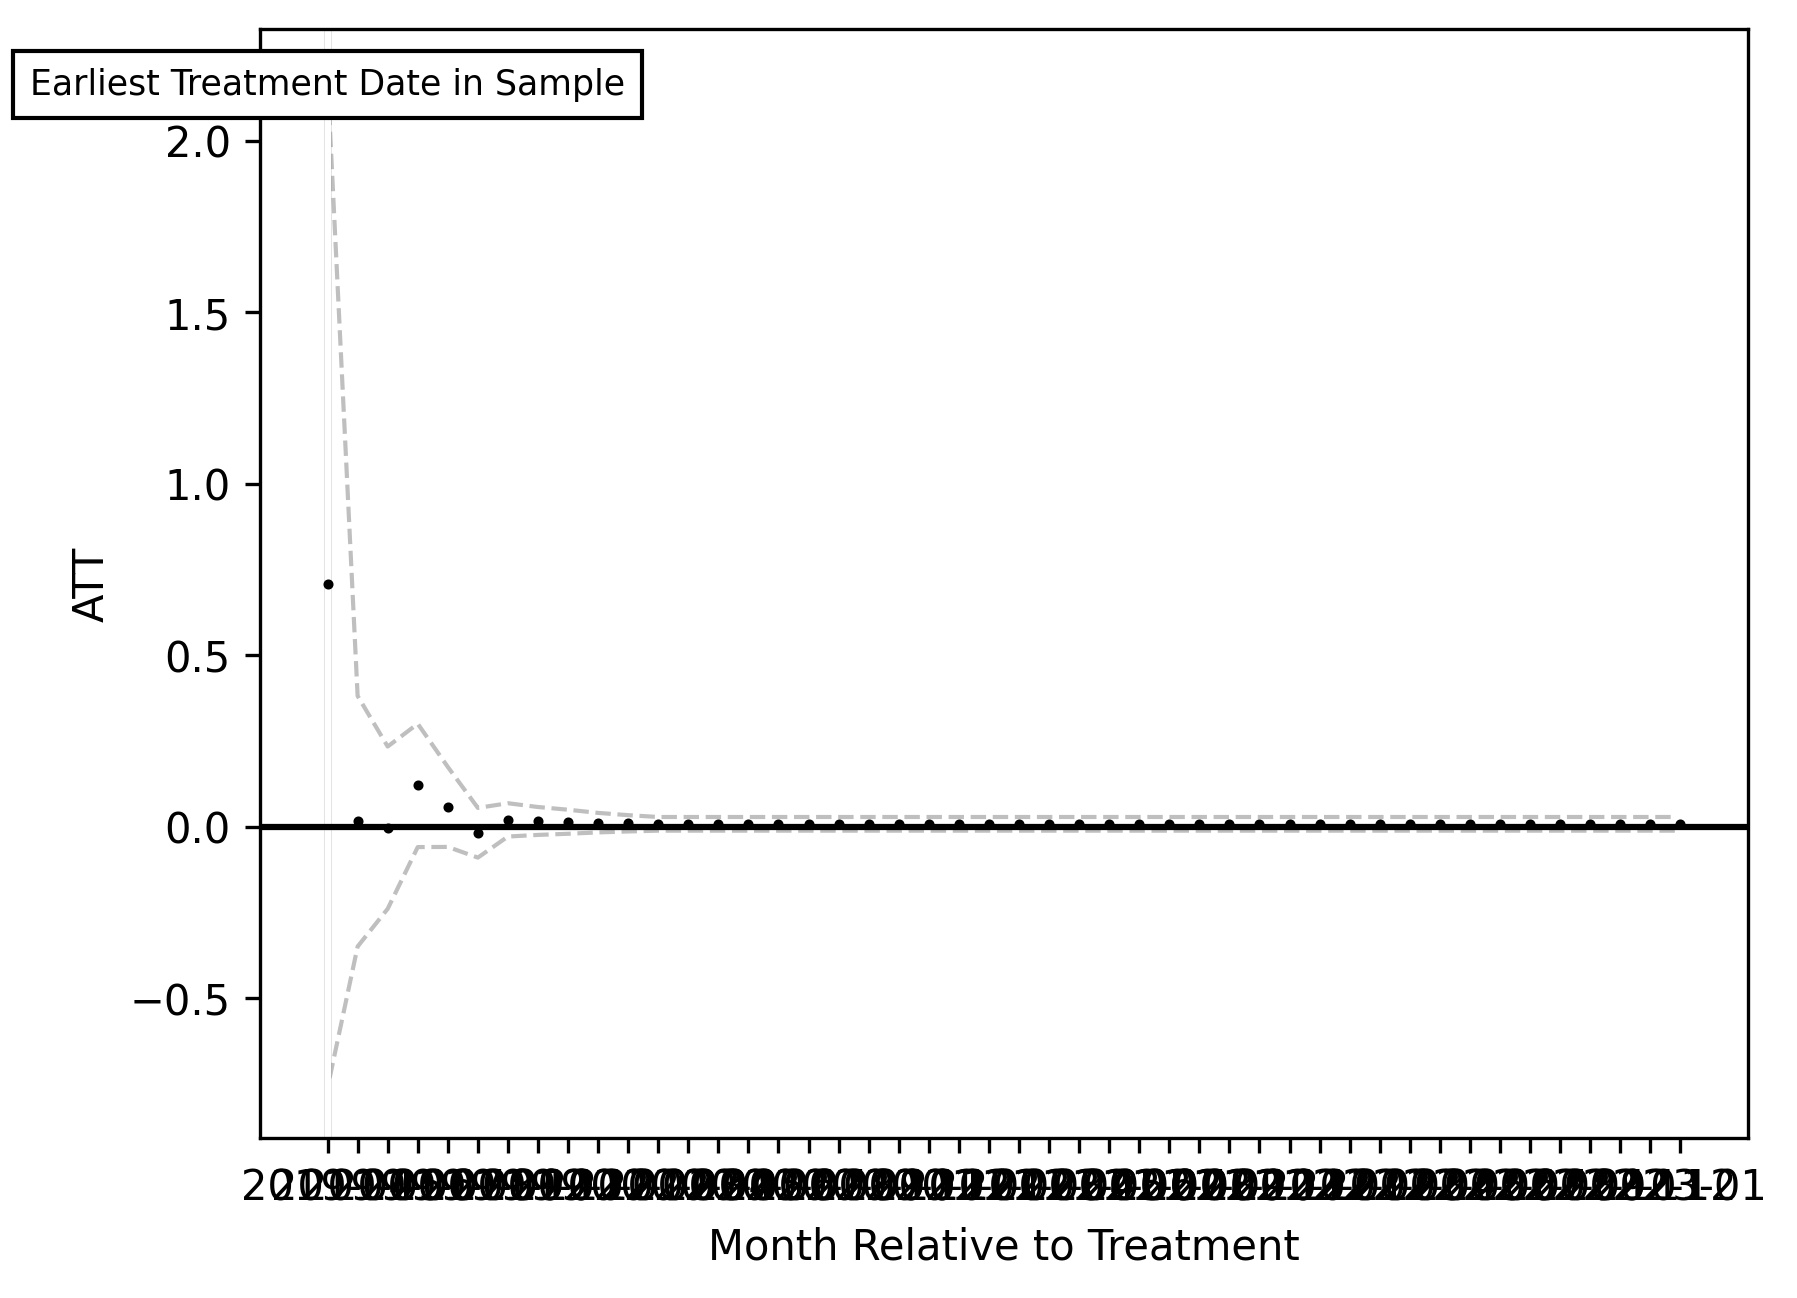

In [10]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="")